## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055
0:	learn: 0.9629179	total: 56.4ms	remaining: 56.3s
1:	learn: 0.9301086	total: 60.7ms	remaining: 30.3s
2:	learn: 0.9005637	total: 63.7ms	remaining: 21.2s
3:	learn: 0.8720983	total: 67.1ms	remaining: 16.7s
4:	learn: 0.8467410	total: 70.1ms	remaining: 14s
5:	learn: 0.8226672	total: 73.2ms	remaining: 12.1s
6:	learn: 0.7994702	total: 76ms	remaining: 10.8s
7:	learn: 0.7784272	total: 78.9ms	remaining: 9.79s
8:	learn: 0.7602192	total: 81.9ms	remaining: 9.01s
9:	learn: 0.7412421	total: 84.6ms	remaining: 8.37s
10:	learn: 0.7247930	total: 87.7ms	remaining: 7.88s
11:	learn: 0.7089951	total: 90.4ms	remaining: 7.44s
12:	learn: 0.6951345	total: 93.3ms	remaining: 7.08s
13:	learn: 0.6809276	total: 96.1ms	remaining: 6.76s
14:	learn: 0.6692630	total: 105ms	remaining: 6.88s
15:	learn: 0.6588323	total: 108ms	remaining: 6.65s
16:	learn: 0.6472700	total: 111ms	remaining: 6.41s
17:	learn: 0.6379982	total: 114ms	remaining: 6.19s
18:	learn: 0.6294674	total: 116ms	remaining: 6.01s
1

30:	learn: 0.5536829	total: 182ms	remaining: 5.7s
31:	learn: 0.5505614	total: 186ms	remaining: 5.62s
32:	learn: 0.5475131	total: 188ms	remaining: 5.52s
33:	learn: 0.5445860	total: 191ms	remaining: 5.42s
34:	learn: 0.5398906	total: 194ms	remaining: 5.35s
35:	learn: 0.5363592	total: 197ms	remaining: 5.27s
36:	learn: 0.5337228	total: 200ms	remaining: 5.21s
37:	learn: 0.5296892	total: 203ms	remaining: 5.14s
38:	learn: 0.5255485	total: 206ms	remaining: 5.07s
39:	learn: 0.5217941	total: 209ms	remaining: 5.01s
40:	learn: 0.5196440	total: 212ms	remaining: 4.95s
41:	learn: 0.5170220	total: 214ms	remaining: 4.89s
42:	learn: 0.5141148	total: 217ms	remaining: 4.83s
43:	learn: 0.5116444	total: 220ms	remaining: 4.78s
44:	learn: 0.5100547	total: 223ms	remaining: 4.73s
45:	learn: 0.5069096	total: 226ms	remaining: 4.68s
46:	learn: 0.5051685	total: 229ms	remaining: 4.64s
47:	learn: 0.5033968	total: 232ms	remaining: 4.6s
48:	learn: 0.5012433	total: 235ms	remaining: 4.56s
49:	learn: 0.4986132	total: 238ms

96:	learn: 0.4520952	total: 375ms	remaining: 3.49s
97:	learn: 0.4513919	total: 378ms	remaining: 3.48s
98:	learn: 0.4503747	total: 381ms	remaining: 3.46s
99:	learn: 0.4494783	total: 384ms	remaining: 3.45s
100:	learn: 0.4487329	total: 387ms	remaining: 3.44s
101:	learn: 0.4481325	total: 393ms	remaining: 3.46s
102:	learn: 0.4475445	total: 396ms	remaining: 3.44s
103:	learn: 0.4466014	total: 400ms	remaining: 3.44s
104:	learn: 0.4461730	total: 403ms	remaining: 3.43s
105:	learn: 0.4457259	total: 406ms	remaining: 3.42s
106:	learn: 0.4451085	total: 408ms	remaining: 3.41s
107:	learn: 0.4447909	total: 411ms	remaining: 3.4s
108:	learn: 0.4440936	total: 414ms	remaining: 3.38s
109:	learn: 0.4435519	total: 417ms	remaining: 3.37s
110:	learn: 0.4431075	total: 420ms	remaining: 3.36s
111:	learn: 0.4425498	total: 423ms	remaining: 3.35s
112:	learn: 0.4419106	total: 426ms	remaining: 3.34s
113:	learn: 0.4414425	total: 429ms	remaining: 3.34s
114:	learn: 0.4407446	total: 432ms	remaining: 3.33s
115:	learn: 0.440

160:	learn: 0.4201256	total: 566ms	remaining: 2.95s
161:	learn: 0.4197073	total: 569ms	remaining: 2.94s
162:	learn: 0.4192052	total: 572ms	remaining: 2.94s
163:	learn: 0.4187949	total: 575ms	remaining: 2.93s
164:	learn: 0.4184572	total: 578ms	remaining: 2.92s
165:	learn: 0.4180680	total: 581ms	remaining: 2.92s
166:	learn: 0.4176884	total: 584ms	remaining: 2.91s
167:	learn: 0.4173026	total: 587ms	remaining: 2.91s
168:	learn: 0.4170486	total: 590ms	remaining: 2.9s
169:	learn: 0.4165960	total: 596ms	remaining: 2.91s
170:	learn: 0.4161870	total: 599ms	remaining: 2.9s
171:	learn: 0.4156228	total: 602ms	remaining: 2.9s
172:	learn: 0.4153041	total: 605ms	remaining: 2.89s
173:	learn: 0.4148857	total: 608ms	remaining: 2.89s
174:	learn: 0.4144190	total: 611ms	remaining: 2.88s
175:	learn: 0.4140875	total: 614ms	remaining: 2.87s
176:	learn: 0.4136755	total: 617ms	remaining: 2.87s
177:	learn: 0.4133860	total: 620ms	remaining: 2.86s
178:	learn: 0.4129780	total: 622ms	remaining: 2.85s
179:	learn: 0.4

223:	learn: 0.3976462	total: 758ms	remaining: 2.63s
224:	learn: 0.3973704	total: 761ms	remaining: 2.62s
225:	learn: 0.3971729	total: 764ms	remaining: 2.62s
226:	learn: 0.3968841	total: 767ms	remaining: 2.61s
227:	learn: 0.3965787	total: 770ms	remaining: 2.61s
228:	learn: 0.3963073	total: 773ms	remaining: 2.6s
229:	learn: 0.3960925	total: 776ms	remaining: 2.6s
230:	learn: 0.3957018	total: 778ms	remaining: 2.59s
231:	learn: 0.3954162	total: 781ms	remaining: 2.58s
232:	learn: 0.3951665	total: 784ms	remaining: 2.58s
233:	learn: 0.3949269	total: 787ms	remaining: 2.57s
234:	learn: 0.3945894	total: 800ms	remaining: 2.6s
235:	learn: 0.3944181	total: 803ms	remaining: 2.6s
236:	learn: 0.3941497	total: 806ms	remaining: 2.59s
237:	learn: 0.3939819	total: 809ms	remaining: 2.59s
238:	learn: 0.3938322	total: 812ms	remaining: 2.58s
239:	learn: 0.3935463	total: 815ms	remaining: 2.58s
240:	learn: 0.3933166	total: 817ms	remaining: 2.57s
241:	learn: 0.3930992	total: 820ms	remaining: 2.57s
242:	learn: 0.39

287:	learn: 0.3821767	total: 952ms	remaining: 2.35s
288:	learn: 0.3819748	total: 955ms	remaining: 2.35s
289:	learn: 0.3817667	total: 957ms	remaining: 2.34s
290:	learn: 0.3815253	total: 960ms	remaining: 2.34s
291:	learn: 0.3813529	total: 963ms	remaining: 2.33s
292:	learn: 0.3812172	total: 966ms	remaining: 2.33s
293:	learn: 0.3809978	total: 969ms	remaining: 2.33s
294:	learn: 0.3807825	total: 972ms	remaining: 2.32s
295:	learn: 0.3805940	total: 975ms	remaining: 2.32s
296:	learn: 0.3801959	total: 978ms	remaining: 2.31s
297:	learn: 0.3799439	total: 980ms	remaining: 2.31s
298:	learn: 0.3797228	total: 983ms	remaining: 2.3s
299:	learn: 0.3795554	total: 986ms	remaining: 2.3s
300:	learn: 0.3793733	total: 989ms	remaining: 2.3s
301:	learn: 0.3791607	total: 992ms	remaining: 2.29s
302:	learn: 0.3789297	total: 995ms	remaining: 2.29s
303:	learn: 0.3787482	total: 997ms	remaining: 2.28s
304:	learn: 0.3786528	total: 1000ms	remaining: 2.28s
305:	learn: 0.3784406	total: 1s	remaining: 2.27s
306:	learn: 0.378

352:	learn: 0.3697314	total: 1.14s	remaining: 2.09s
353:	learn: 0.3695617	total: 1.14s	remaining: 2.08s
354:	learn: 0.3694397	total: 1.15s	remaining: 2.08s
355:	learn: 0.3692589	total: 1.15s	remaining: 2.08s
356:	learn: 0.3691107	total: 1.15s	remaining: 2.07s
357:	learn: 0.3689645	total: 1.15s	remaining: 2.07s
358:	learn: 0.3687886	total: 1.16s	remaining: 2.07s
359:	learn: 0.3686485	total: 1.16s	remaining: 2.07s
360:	learn: 0.3685749	total: 1.17s	remaining: 2.08s
361:	learn: 0.3683909	total: 1.18s	remaining: 2.07s
362:	learn: 0.3682710	total: 1.18s	remaining: 2.07s
363:	learn: 0.3681254	total: 1.18s	remaining: 2.07s
364:	learn: 0.3679761	total: 1.19s	remaining: 2.06s
365:	learn: 0.3677932	total: 1.19s	remaining: 2.06s
366:	learn: 0.3676022	total: 1.19s	remaining: 2.06s
367:	learn: 0.3674148	total: 1.2s	remaining: 2.06s
368:	learn: 0.3673439	total: 1.2s	remaining: 2.05s
369:	learn: 0.3671985	total: 1.2s	remaining: 2.05s
370:	learn: 0.3670563	total: 1.21s	remaining: 2.05s
371:	learn: 0.3

409:	learn: 0.3608193	total: 1.33s	remaining: 1.92s
410:	learn: 0.3604920	total: 1.33s	remaining: 1.91s
411:	learn: 0.3603038	total: 1.34s	remaining: 1.91s
412:	learn: 0.3602055	total: 1.34s	remaining: 1.9s
413:	learn: 0.3599094	total: 1.34s	remaining: 1.9s
414:	learn: 0.3597887	total: 1.34s	remaining: 1.9s
415:	learn: 0.3595791	total: 1.35s	remaining: 1.89s
416:	learn: 0.3594487	total: 1.35s	remaining: 1.89s
417:	learn: 0.3592759	total: 1.35s	remaining: 1.89s
418:	learn: 0.3591088	total: 1.36s	remaining: 1.88s
419:	learn: 0.3589470	total: 1.36s	remaining: 1.88s
420:	learn: 0.3587972	total: 1.36s	remaining: 1.88s
421:	learn: 0.3586831	total: 1.37s	remaining: 1.87s
422:	learn: 0.3585620	total: 1.37s	remaining: 1.87s
423:	learn: 0.3584427	total: 1.37s	remaining: 1.86s
424:	learn: 0.3583044	total: 1.38s	remaining: 1.86s
425:	learn: 0.3581698	total: 1.38s	remaining: 1.86s
426:	learn: 0.3580461	total: 1.38s	remaining: 1.85s
427:	learn: 0.3579182	total: 1.38s	remaining: 1.85s
428:	learn: 0.3

473:	learn: 0.3514906	total: 1.52s	remaining: 1.69s
474:	learn: 0.3513843	total: 1.53s	remaining: 1.69s
475:	learn: 0.3512406	total: 1.53s	remaining: 1.68s
476:	learn: 0.3510044	total: 1.53s	remaining: 1.68s
477:	learn: 0.3509121	total: 1.54s	remaining: 1.68s
478:	learn: 0.3507270	total: 1.54s	remaining: 1.67s
479:	learn: 0.3506003	total: 1.54s	remaining: 1.67s
480:	learn: 0.3505111	total: 1.54s	remaining: 1.67s
481:	learn: 0.3503906	total: 1.55s	remaining: 1.66s
482:	learn: 0.3501522	total: 1.55s	remaining: 1.66s
483:	learn: 0.3500494	total: 1.55s	remaining: 1.66s
484:	learn: 0.3498921	total: 1.56s	remaining: 1.65s
485:	learn: 0.3497143	total: 1.56s	remaining: 1.65s
486:	learn: 0.3496172	total: 1.56s	remaining: 1.65s
487:	learn: 0.3494609	total: 1.56s	remaining: 1.64s
488:	learn: 0.3493200	total: 1.57s	remaining: 1.64s
489:	learn: 0.3491550	total: 1.57s	remaining: 1.64s
490:	learn: 0.3490323	total: 1.57s	remaining: 1.63s
491:	learn: 0.3488767	total: 1.58s	remaining: 1.63s
492:	learn: 

535:	learn: 0.3432219	total: 1.71s	remaining: 1.48s
536:	learn: 0.3431615	total: 1.72s	remaining: 1.48s
537:	learn: 0.3430198	total: 1.72s	remaining: 1.48s
538:	learn: 0.3429422	total: 1.72s	remaining: 1.47s
539:	learn: 0.3428024	total: 1.73s	remaining: 1.47s
540:	learn: 0.3426641	total: 1.73s	remaining: 1.47s
541:	learn: 0.3425885	total: 1.73s	remaining: 1.47s
542:	learn: 0.3424695	total: 1.74s	remaining: 1.46s
543:	learn: 0.3423997	total: 1.74s	remaining: 1.46s
544:	learn: 0.3422315	total: 1.74s	remaining: 1.46s
545:	learn: 0.3421242	total: 1.75s	remaining: 1.45s
546:	learn: 0.3419673	total: 1.75s	remaining: 1.45s
547:	learn: 0.3418121	total: 1.75s	remaining: 1.45s
548:	learn: 0.3416228	total: 1.76s	remaining: 1.44s
549:	learn: 0.3414331	total: 1.76s	remaining: 1.44s
550:	learn: 0.3413090	total: 1.76s	remaining: 1.44s
551:	learn: 0.3411591	total: 1.77s	remaining: 1.43s
552:	learn: 0.3410901	total: 1.77s	remaining: 1.43s
553:	learn: 0.3409923	total: 1.77s	remaining: 1.43s
554:	learn: 

595:	learn: 0.3367491	total: 1.91s	remaining: 1.29s
596:	learn: 0.3366496	total: 1.91s	remaining: 1.29s
597:	learn: 0.3365561	total: 1.91s	remaining: 1.29s
598:	learn: 0.3364801	total: 1.92s	remaining: 1.28s
599:	learn: 0.3363937	total: 1.92s	remaining: 1.28s
600:	learn: 0.3363054	total: 1.92s	remaining: 1.28s
601:	learn: 0.3361892	total: 1.93s	remaining: 1.27s
602:	learn: 0.3360683	total: 1.93s	remaining: 1.27s
603:	learn: 0.3359807	total: 1.93s	remaining: 1.27s
604:	learn: 0.3359096	total: 1.94s	remaining: 1.26s
605:	learn: 0.3358268	total: 1.94s	remaining: 1.26s
606:	learn: 0.3356597	total: 1.94s	remaining: 1.26s
607:	learn: 0.3355448	total: 1.95s	remaining: 1.25s
608:	learn: 0.3354512	total: 1.95s	remaining: 1.25s
609:	learn: 0.3353398	total: 1.95s	remaining: 1.25s
610:	learn: 0.3352669	total: 1.96s	remaining: 1.25s
611:	learn: 0.3351716	total: 1.96s	remaining: 1.24s
612:	learn: 0.3351155	total: 1.96s	remaining: 1.24s
613:	learn: 0.3350041	total: 1.97s	remaining: 1.24s
614:	learn: 

656:	learn: 0.3305729	total: 2.1s	remaining: 1.1s
657:	learn: 0.3304900	total: 2.11s	remaining: 1.09s
658:	learn: 0.3303842	total: 2.11s	remaining: 1.09s
659:	learn: 0.3302235	total: 2.11s	remaining: 1.09s
660:	learn: 0.3300983	total: 2.12s	remaining: 1.08s
661:	learn: 0.3299994	total: 2.12s	remaining: 1.08s
662:	learn: 0.3299184	total: 2.12s	remaining: 1.08s
663:	learn: 0.3298189	total: 2.12s	remaining: 1.07s
664:	learn: 0.3296970	total: 2.13s	remaining: 1.07s
665:	learn: 0.3296671	total: 2.13s	remaining: 1.07s
666:	learn: 0.3295999	total: 2.13s	remaining: 1.06s
667:	learn: 0.3295390	total: 2.14s	remaining: 1.06s
668:	learn: 0.3294195	total: 2.14s	remaining: 1.06s
669:	learn: 0.3293185	total: 2.14s	remaining: 1.05s
670:	learn: 0.3292086	total: 2.15s	remaining: 1.05s
671:	learn: 0.3289913	total: 2.15s	remaining: 1.05s
672:	learn: 0.3288859	total: 2.15s	remaining: 1.04s
673:	learn: 0.3288145	total: 2.15s	remaining: 1.04s
674:	learn: 0.3286969	total: 2.16s	remaining: 1.04s
675:	learn: 0.

716:	learn: 0.3249511	total: 2.29s	remaining: 905ms
717:	learn: 0.3248372	total: 2.3s	remaining: 902ms
718:	learn: 0.3247371	total: 2.3s	remaining: 899ms
719:	learn: 0.3246676	total: 2.3s	remaining: 896ms
720:	learn: 0.3245862	total: 2.31s	remaining: 893ms
721:	learn: 0.3245270	total: 2.31s	remaining: 889ms
722:	learn: 0.3244558	total: 2.31s	remaining: 886ms
723:	learn: 0.3243835	total: 2.31s	remaining: 883ms
724:	learn: 0.3242957	total: 2.32s	remaining: 879ms
725:	learn: 0.3242628	total: 2.32s	remaining: 876ms
726:	learn: 0.3242076	total: 2.32s	remaining: 873ms
727:	learn: 0.3240923	total: 2.33s	remaining: 870ms
728:	learn: 0.3240148	total: 2.33s	remaining: 866ms
729:	learn: 0.3239014	total: 2.33s	remaining: 863ms
730:	learn: 0.3237918	total: 2.34s	remaining: 860ms
731:	learn: 0.3236654	total: 2.34s	remaining: 857ms
732:	learn: 0.3235938	total: 2.34s	remaining: 854ms
733:	learn: 0.3235120	total: 2.35s	remaining: 850ms
734:	learn: 0.3234421	total: 2.35s	remaining: 847ms
735:	learn: 0.3

776:	learn: 0.3197430	total: 2.48s	remaining: 713ms
777:	learn: 0.3196478	total: 2.49s	remaining: 710ms
778:	learn: 0.3194714	total: 2.49s	remaining: 707ms
779:	learn: 0.3194042	total: 2.49s	remaining: 703ms
780:	learn: 0.3193209	total: 2.5s	remaining: 700ms
781:	learn: 0.3192009	total: 2.5s	remaining: 697ms
782:	learn: 0.3191109	total: 2.5s	remaining: 694ms
783:	learn: 0.3190255	total: 2.5s	remaining: 690ms
784:	learn: 0.3189403	total: 2.51s	remaining: 687ms
785:	learn: 0.3188715	total: 2.51s	remaining: 684ms
786:	learn: 0.3188016	total: 2.51s	remaining: 681ms
787:	learn: 0.3187670	total: 2.52s	remaining: 677ms
788:	learn: 0.3186601	total: 2.52s	remaining: 674ms
789:	learn: 0.3185886	total: 2.52s	remaining: 671ms
790:	learn: 0.3185418	total: 2.53s	remaining: 667ms
791:	learn: 0.3184514	total: 2.53s	remaining: 664ms
792:	learn: 0.3183529	total: 2.53s	remaining: 661ms
793:	learn: 0.3182569	total: 2.54s	remaining: 658ms
794:	learn: 0.3181932	total: 2.54s	remaining: 655ms
795:	learn: 0.31

838:	learn: 0.3145737	total: 2.67s	remaining: 513ms
839:	learn: 0.3144908	total: 2.68s	remaining: 510ms
840:	learn: 0.3144038	total: 2.68s	remaining: 507ms
841:	learn: 0.3143434	total: 2.68s	remaining: 504ms
842:	learn: 0.3142662	total: 2.69s	remaining: 500ms
843:	learn: 0.3141532	total: 2.69s	remaining: 498ms
844:	learn: 0.3140919	total: 2.69s	remaining: 494ms
845:	learn: 0.3140384	total: 2.7s	remaining: 491ms
846:	learn: 0.3139822	total: 2.7s	remaining: 488ms
847:	learn: 0.3138839	total: 2.7s	remaining: 485ms
848:	learn: 0.3138291	total: 2.71s	remaining: 482ms
849:	learn: 0.3137772	total: 2.71s	remaining: 478ms
850:	learn: 0.3137138	total: 2.71s	remaining: 475ms
851:	learn: 0.3136859	total: 2.72s	remaining: 472ms
852:	learn: 0.3136054	total: 2.72s	remaining: 469ms
853:	learn: 0.3135239	total: 2.72s	remaining: 466ms
854:	learn: 0.3134711	total: 2.73s	remaining: 462ms
855:	learn: 0.3134242	total: 2.73s	remaining: 459ms
856:	learn: 0.3133249	total: 2.73s	remaining: 456ms
857:	learn: 0.3

899:	learn: 0.3100512	total: 2.87s	remaining: 318ms
900:	learn: 0.3100138	total: 2.87s	remaining: 315ms
901:	learn: 0.3099635	total: 2.87s	remaining: 312ms
902:	learn: 0.3098989	total: 2.88s	remaining: 309ms
903:	learn: 0.3098084	total: 2.88s	remaining: 306ms
904:	learn: 0.3097402	total: 2.88s	remaining: 302ms
905:	learn: 0.3096378	total: 2.88s	remaining: 299ms
906:	learn: 0.3095878	total: 2.89s	remaining: 296ms
907:	learn: 0.3095154	total: 2.89s	remaining: 293ms
908:	learn: 0.3094688	total: 2.89s	remaining: 290ms
909:	learn: 0.3093784	total: 2.9s	remaining: 287ms
910:	learn: 0.3093058	total: 2.9s	remaining: 283ms
911:	learn: 0.3092574	total: 2.9s	remaining: 280ms
912:	learn: 0.3092023	total: 2.91s	remaining: 277ms
913:	learn: 0.3091306	total: 2.91s	remaining: 274ms
914:	learn: 0.3090719	total: 2.91s	remaining: 271ms
915:	learn: 0.3090199	total: 2.92s	remaining: 267ms
916:	learn: 0.3089417	total: 2.92s	remaining: 264ms
917:	learn: 0.3088562	total: 2.92s	remaining: 261ms
918:	learn: 0.3

961:	learn: 0.3054462	total: 3.06s	remaining: 121ms
962:	learn: 0.3053516	total: 3.06s	remaining: 118ms
963:	learn: 0.3052664	total: 3.06s	remaining: 114ms
964:	learn: 0.3052264	total: 3.07s	remaining: 111ms
965:	learn: 0.3051873	total: 3.07s	remaining: 108ms
966:	learn: 0.3051018	total: 3.07s	remaining: 105ms
967:	learn: 0.3050172	total: 3.08s	remaining: 102ms
968:	learn: 0.3049470	total: 3.08s	remaining: 98.5ms
969:	learn: 0.3049028	total: 3.08s	remaining: 95.3ms
970:	learn: 0.3048446	total: 3.08s	remaining: 92.1ms
971:	learn: 0.3047712	total: 3.09s	remaining: 89ms
972:	learn: 0.3047313	total: 3.09s	remaining: 85.8ms
973:	learn: 0.3046600	total: 3.09s	remaining: 82.6ms
974:	learn: 0.3045983	total: 3.1s	remaining: 79.4ms
975:	learn: 0.3044944	total: 3.1s	remaining: 76.2ms
976:	learn: 0.3044431	total: 3.1s	remaining: 73ms
977:	learn: 0.3043959	total: 3.1s	remaining: 69.9ms
978:	learn: 0.3043249	total: 3.11s	remaining: 66.7ms
979:	learn: 0.3042644	total: 3.11s	remaining: 63.5ms
980:	lea

# ABC GAN Model

### Training the network
**Training ABC-GAN for n_epochs number of epochs** 

In [10]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.1, betas=(0.5, 0.999))

In [11]:
#Training the ABC_GAN 
discLossA1,genLossA1 = ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_1 Generator Loss",genLossA1)
sb.glue("ABC_GAN_1 Discriminator Loss",discLossA1)

In [12]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
2.204236157879514


#### Sanity Checks 

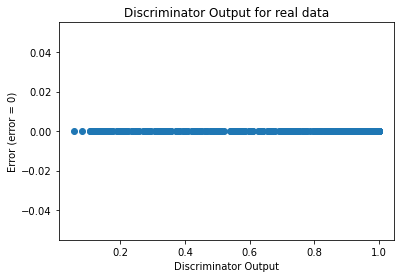

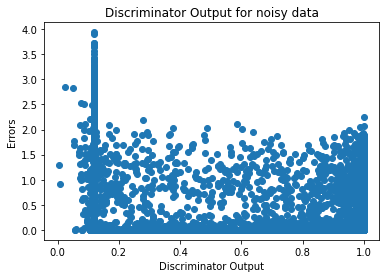

In [13]:
sanityChecks.discProbVsError(real_dataset,disc,device)